### PLOTS

In [4]:
import pandas as pd

# Load the uploaded CSV file to examine the grid search results
file_path = 'grid_search_opt_results_df.csv'
grid_search_results_df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
grid_search_results_df

,constraint,objective,predict_method,accuracy_overall_distorted,accuracy_diff_distorted,accuracy_overall_original,accuracy_diff_original,recall_overall_distorted,recall_diff_distorted,recall_overall_original,...,false_positive_rate_overall_original,false_positive_rate_diff_original,false_negative_rate_overall_distorted,false_negative_rate_diff_distorted,false_negative_rate_overall_original,false_negative_rate_diff_original,selection_rate_overall_distorted,selection_rate_diff_distorted,selection_rate_overall_original,selection_rate_diff_original
0,equalized_odds,balanced_accuracy_score,predict_proba,0.615912,0.064929,0.660244,0.023724,0.399508,0.022386,0.558252,...,0.334535,0.002751,0.600492,0.022386,0.441748,0.411793,0.345431,0.014104,0.345431,0.014104
1,equal_opportunity,balanced_accuracy_score,predict_proba,0.634590,0.272996,0.612484,0.317204,0.615243,0.005157,0.728155,...,0.393439,0.344388,0.384757,0.005157,0.271845,0.251128,0.409741,0.335167,0.409741,0.335167
2,demographic_parity,balanced_accuracy_score,predict_proba,0.648304,0.111278,0.703747,0.000403,0.411801,0.327627,0.720874,...,0.297129,0.003496,0.588199,0.327627,0.279126,0.066119,0.317768,0.000871,0.317768,0.000871


I want to compare 3 constraints:
* Equalised Odds (FPR and TPR parity)
  * equivalent to Separation
* Equal Opportunity (false negative rate (FNR) parity)
  * relaxation of Separation
* Demographic Parity 
  * equivalent to Independence
* *Calibration OR Conditional Use Accuracy Parity (CUAP)*
  * *Equivalent to Sufficiency*
  * There is no sufficency constraint in the Threshold Optimiser package 
    * Use post-processing techniques like Platt scaling​

All use "predict_proba" as the predict method

All use "balanced_accuracy_score" as the Objective function


**Plot types:**
* Bar plot with accuracy differences
* Side by side bar plot for FPR, FNR, Selection Rate

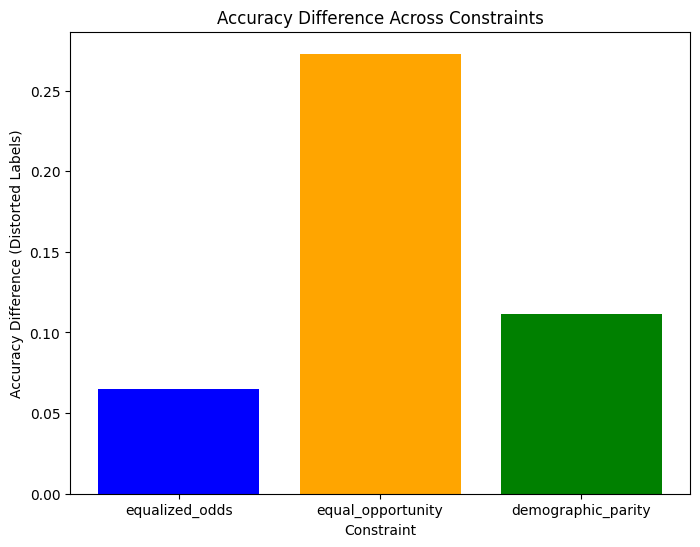

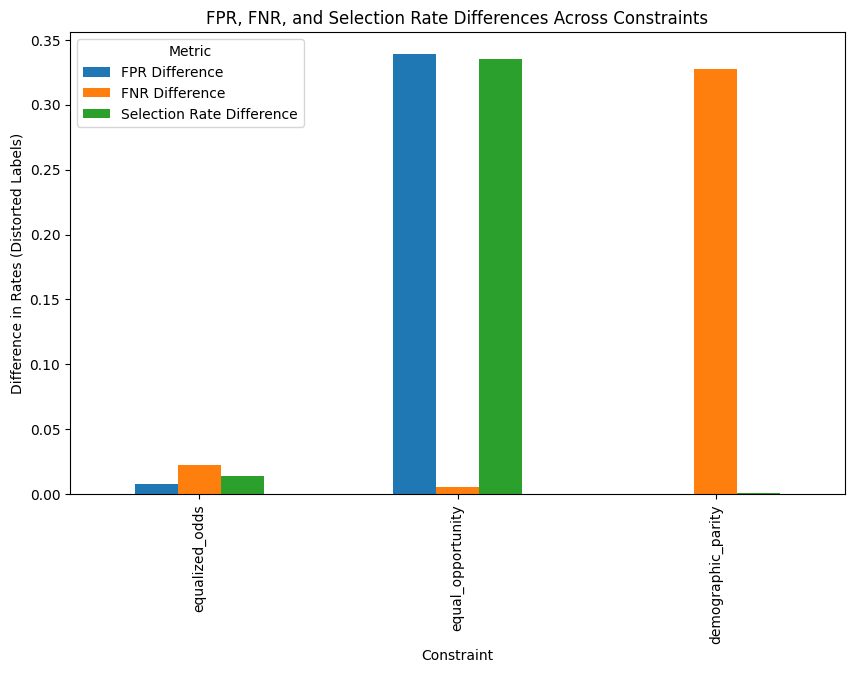

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the grid search results data
file_path = 'grid_search_opt_results_df.csv'
grid_search_results_df = pd.read_csv(file_path)

# Prepare data for the plots
# Filter necessary columns for the plots
accuracy_diff_data = grid_search_results_df[['constraint', 'accuracy_diff_distorted']]
fpr_fnr_selection_data = grid_search_results_df[['constraint', 'false_positive_rate_diff_distorted', 
                                                 'false_negative_rate_diff_distorted', 'selection_rate_diff_distorted']]

# Plot 1: Bar Plot for Accuracy Differences
plt.figure(figsize=(8, 6))
plt.bar(accuracy_diff_data['constraint'], accuracy_diff_data['accuracy_diff_distorted'], color=['blue', 'orange', 'green'])
plt.xlabel('Constraint')
plt.ylabel('Accuracy Difference (Distorted Labels)')
plt.title('Accuracy Difference Across Constraints')
plt.show()

# Plot 2: Side-by-Side Bar Plot for FPR, FNR, and Selection Rate Differences
# Set up for multiple bars per constraint
fpr_fnr_selection_data.set_index('constraint', inplace=True)
fpr_fnr_selection_data.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Constraint')
plt.ylabel('Difference in Rates (Distorted Labels)')
plt.title('FPR, FNR, and Selection Rate Differences Across Constraints')
plt.legend(title="Metric", labels=["FPR Difference", "FNR Difference", "Selection Rate Difference"])
plt.show()


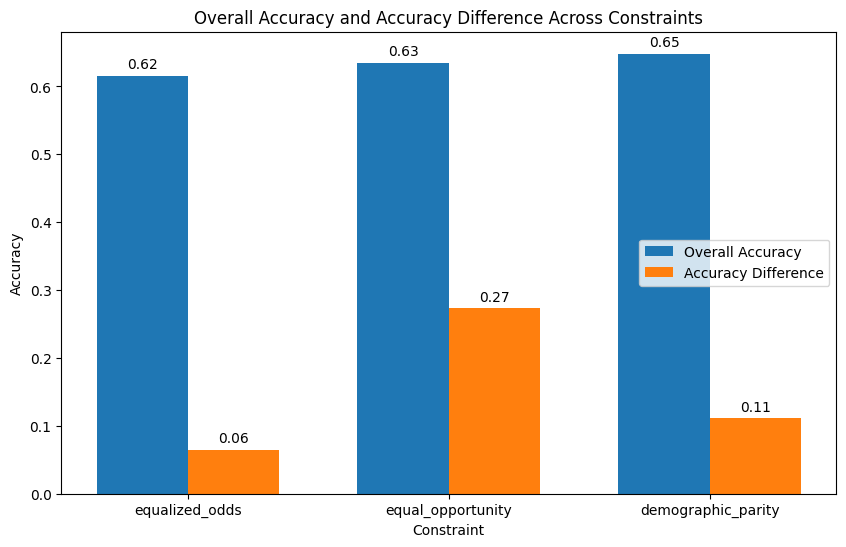

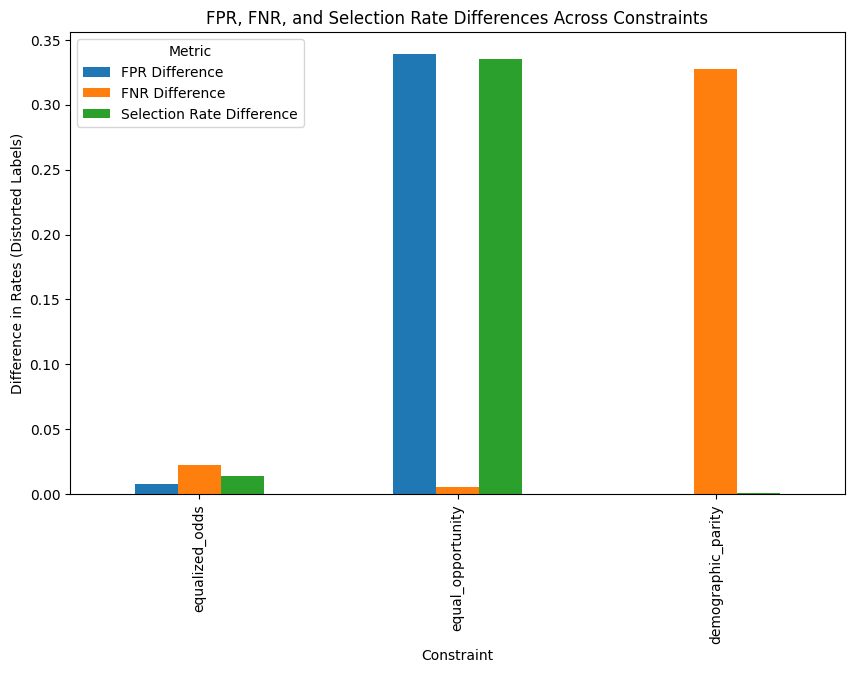

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the grid search results data
file_path = 'grid_search_opt_results_df.csv'
grid_search_results_df = pd.read_csv(file_path)

# Plot 1: Bar Plot for Overall Accuracy and Accuracy Difference
constraints = grid_search_results_df['constraint']
accuracy_overall = grid_search_results_df['accuracy_overall_distorted']
accuracy_diff = grid_search_results_df['accuracy_diff_distorted']

x = np.arange(len(constraints))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, accuracy_overall, width, label='Overall Accuracy')
rects2 = ax.bar(x + width/2, accuracy_diff, width, label='Accuracy Difference')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Constraint')
ax.set_ylabel('Accuracy')
ax.set_title('Overall Accuracy and Accuracy Difference Across Constraints')
ax.set_xticks(x)
ax.set_xticklabels(constraints)
ax.legend()

# Display bar values
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()

# Plot 2: Side-by-Side Bar Plot for FPR, FNR, and Selection Rate Differences
fpr_fnr_selection_data = grid_search_results_df[['constraint', 'false_positive_rate_diff_distorted', 
                                                 'false_negative_rate_diff_distorted', 'selection_rate_diff_distorted']]

fpr_fnr_selection_data.set_index('constraint', inplace=True)
fpr_fnr_selection_data.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Constraint')
plt.ylabel('Difference in Rates (Distorted Labels)')
plt.title('FPR, FNR, and Selection Rate Differences Across Constraints')
plt.legend(title="Metric", labels=["FPR Difference", "FNR Difference", "Selection Rate Difference"])
plt.show()


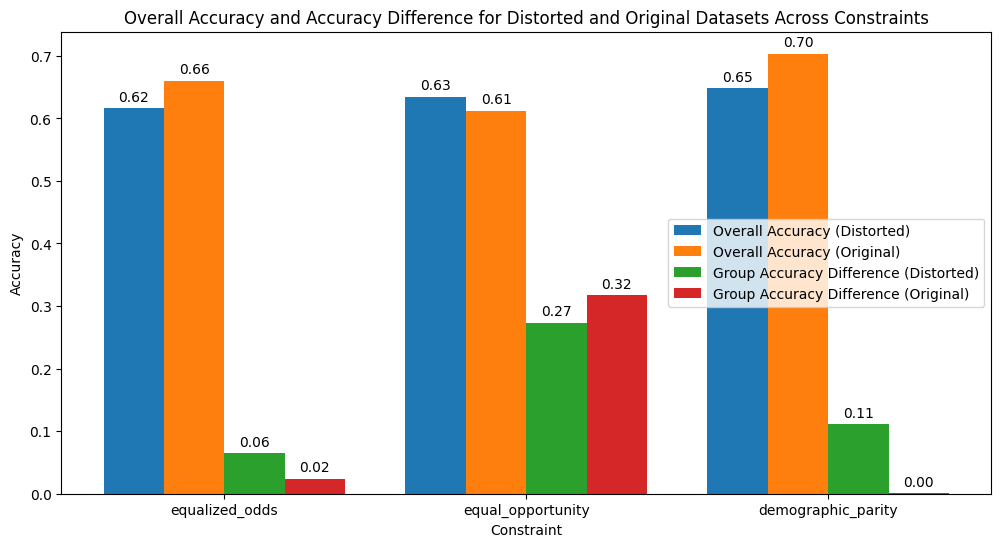

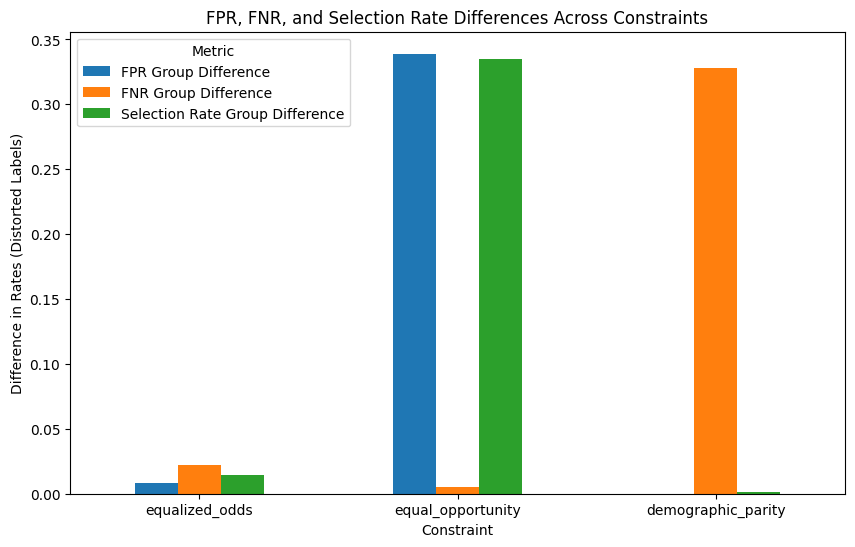

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the grid search results data
file_path = 'grid_search_opt_results_df.csv'
grid_search_results_df = pd.read_csv(file_path)

# Extract relevant data
constraints = grid_search_results_df['constraint']
accuracy_overall_distorted = grid_search_results_df['accuracy_overall_distorted']
accuracy_overall_original = grid_search_results_df['accuracy_overall_original']
accuracy_diff_distorted = grid_search_results_df['accuracy_diff_distorted']
accuracy_diff_original = grid_search_results_df['accuracy_diff_original']

# Set positions for the grouped bars
x = np.arange(len(constraints))  # the label locations
width = 0.2  # the width of the bars

# Plot 1: Grouped Bar Plot for Overall Accuracy and Accuracy Difference
fig, ax = plt.subplots(figsize=(12, 6))

# Overall Accuracy for Distorted and Original
rects1 = ax.bar(x - width, accuracy_overall_distorted, width, label='Overall Accuracy (Distorted)')
rects2 = ax.bar(x, accuracy_overall_original, width, label='Overall Accuracy (Original)')

# Accuracy Difference for Distorted and Original
rects3 = ax.bar(x + width, accuracy_diff_distorted, width, label='Group Accuracy Difference (Distorted)')
rects4 = ax.bar(x + 2 * width, accuracy_diff_original, width, label='Group Accuracy Difference (Original)')

# Add labels and title
ax.set_xlabel('Constraint')
ax.set_ylabel('Accuracy')
ax.set_title('Overall Accuracy and Accuracy Difference for Distorted and Original Datasets Across Constraints')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(constraints)
ax.legend()

# Display bar values
for rect in rects1 + rects2 + rects3 + rects4:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
plt.savefig('images/accuracy_grouped_bar_plot.png')
plt.show()

# Plot 2: Side-by-Side Bar Plot for FPR, FNR, and Selection Rate Differences
fpr_fnr_selection_data = grid_search_results_df[['constraint', 'false_positive_rate_diff_distorted', 
                                                 'false_negative_rate_diff_distorted', 'selection_rate_diff_distorted']]

fpr_fnr_selection_data.set_index('constraint', inplace=True)
fpr_fnr_selection_data.plot(kind='bar', figsize=(10, 6))
plt.xticks(rotation=0)
plt.xlabel('Constraint')
plt.ylabel('Difference in Rates (Distorted Labels)')
plt.title('FPR, FNR, and Selection Rate Differences Across Constraints')
plt.legend(title="Metric", labels=["FPR Group Difference", "FNR Group Difference", "Selection Rate Group Difference"])
plt.savefig('images/fpr_fnr_select_grouped_bar_plot.png')
plt.show()
